In [28]:
from data.data import load_physical_data
import pandas as pd
import numpy as np

In [29]:
df_physical = load_physical_data()

In [30]:
# surface 
df_physical

,Orientation (deg),Crystallinity (%),Strength (MPa)
0,0.00,30.00,221.608725
1,0.00,75.00,254.913360
2,0.00,30.00,219.289259
3,0.00,41.25,245.220929
4,0.00,52.50,187.546049
5,0.00,63.75,256.359249
6,0.00,75.00,239.538392
7,11.25,30.00,205.707447
8,11.25,41.25,206.983226
9,11.25,52.50,233.985793


In [ ]:
# add orientation column negative

df_copy = df_physical.copy()
df_copy['Orientation (deg)'] = df_copy['Orientation (deg)'].apply(lambda x: -x if x != 0 else x)

# append the original data
df_physical = pd.concat([df_physical, df_copy], ignore_index=True) 

Text(0.5, 1.0, 'Strength (MPa) vs Orientation and Crystallinity')

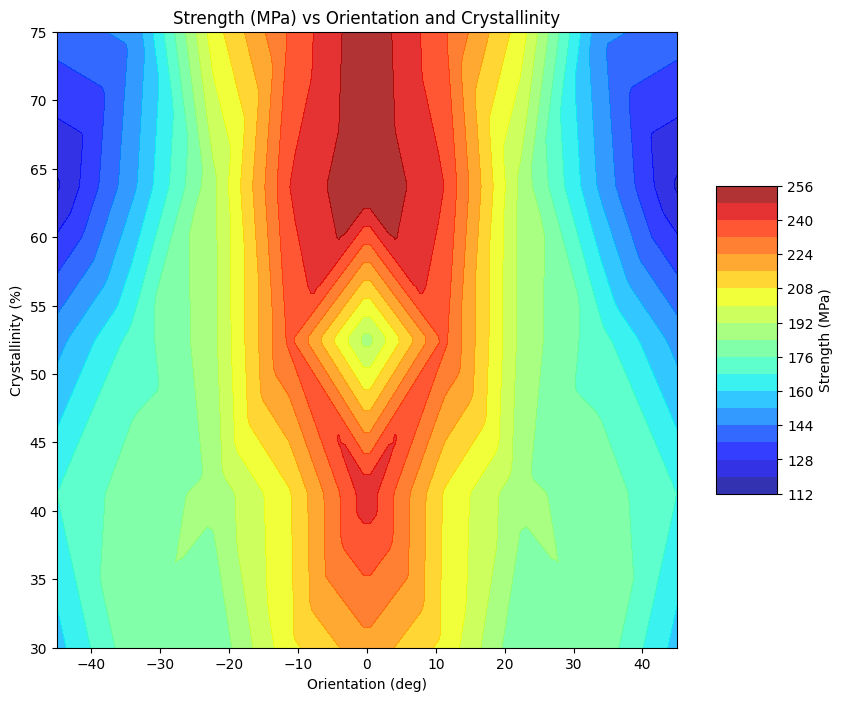

In [32]:
oirentation   = np.array(df_physical['Orientation (deg)'])
crystallinity = np.array(df_physical['Crystallinity (%)'])
strength      = np.array(df_physical['Strength (MPa)'])

# plot contourf and scatter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# Create grid points
xi = np.linspace(oirentation.min(), oirentation.max(), 100)
yi = np.linspace(crystallinity.min(), crystallinity.max(), 100)
xi, yi = np.meshgrid(xi, yi)
# Interpolate the strength values on the grid

zi = griddata((oirentation, crystallinity), strength, (xi, yi), method='linear')
# Plot the surface
surf = ax.contourf(xi, yi, zi, 20, cmap=cm.jet, alpha=0.8)
# Plot the scatter points
# colorbar 
plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Strength (MPa)')
# labels
ax.set_xlabel('Orientation (deg)')
ax.set_ylabel('Crystallinity (%)')
ax.set_title('Strength (MPa) vs Orientation and Crystallinity')